In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import math

In [2]:
List1=[]
List2=[]
for i in range (1,360):
    List1.append(i)
    List2.append(math.sin((2*math.pi*i)/360))
#### Data Complete
df=pd.DataFrame({'X': List1,'Y': List2,})
#### Data with elements deleted
df2=df.copy()
for i in range(len(df)):
    if ((i>=15 and i<=35)or(i>=90 and i<=115)or(i>=215 and i<=230)or(i>=300 and i<=310)):
        df2['Y'][i]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


# Kalman Filter

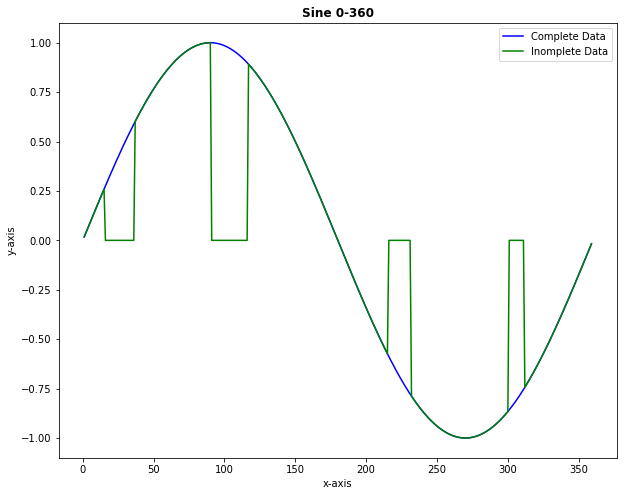

In [200]:
fig, ax = plt.subplots()

# Complete Graph
plt.plot(df['X'],df['Y'],color='b',label='Complete Data') 
# Incomplete Graph
plt.plot(df2['X'],df2['Y'],color='g',label='Inomplete Data') 

plt.legend(loc='best')
ax.set_ylabel("y-axis")
ax.set_xlabel("x-axis")
  
plt.title('Sine 0-360', fontweight='bold')
plt.show()

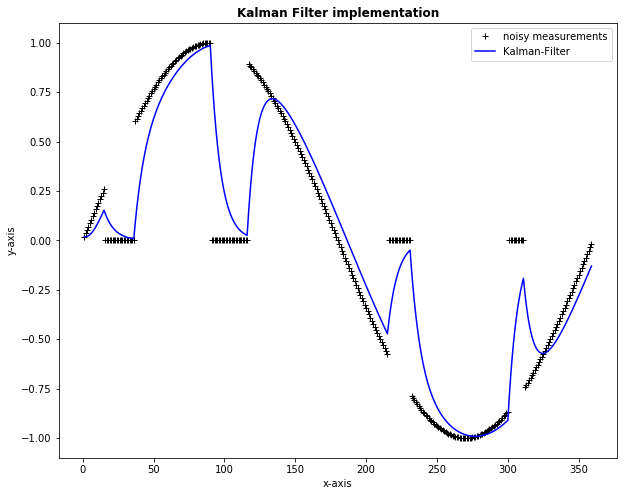

In [194]:
from pykalman import KalmanFilter 

X = df2
y = df2['Y']

estimated_value= np.array(X)
real_value = np.array(y)

measurements = np.asarray(estimated_value)

kf = KalmanFilter(n_dim_obs=1, n_dim_state=1, 
                  transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=measurements[0,1], 
                  initial_state_covariance=1,
                  observation_covariance=50,
                  transition_covariance=1)

state_means, state_covariances = kf.filter(measurements[:,1]) 
state_std = np.sqrt(state_covariances[:,0])
#print (state_std)
#print (state_means)
#print (state_covariances)


fig, ax = plt.subplots()

plt.plot(df2['X'], df2['Y'], 'k+',label='noisy measurements') 
plt.plot(df2['X'],  state_means, '-b', label='Kalman-Filter') 
plt.legend(loc='best')
ax.set_ylabel("y-axis")
ax.set_xlabel("x-axis")
plt.title('Kalman Filter implementation', fontweight='bold')
plt.show()

## Second implementation

Text(0,0.5,'y-axis')

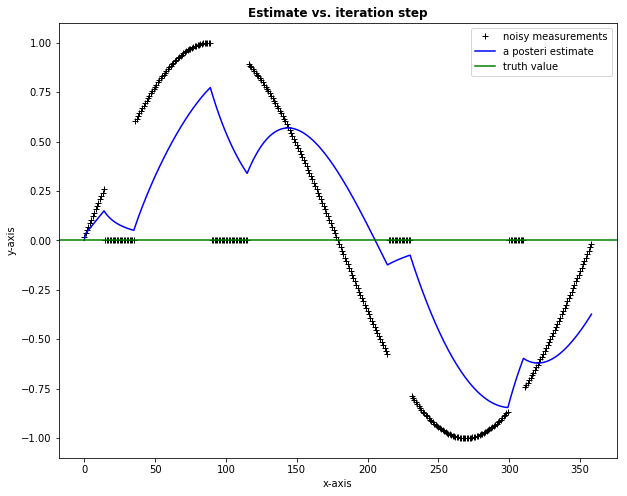

In [157]:
import numpy as np
import matplotlib.pyplot as plt

X = df2.drop('X',axis=1)
z= np.array(X)

# intial parameters
n_iter = 359
sz = (359,) # size of array
x = 0 # truth value (typo in example at top of p. 13 calls this z)
#z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

